# Importing Libraries:
- Pytorch and its modules like Transforms, Torchvision, Models, Optimizers etc.
- Sklearn for Training, Testing, for Classification Report and Confusion Matrix.

In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from sklearn.model_selection import train_test_split


# Defining a Neural Network:
- Model consists of two fully connected layers and one ReLU activation layer. These layers are connected sequentially, forming a simple feedforward neural network architecture.



In [5]:
# Define a simple feedforward neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)  # Flatten the input
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Installing Torchsummary:

In [6]:
!pip install torchsummary

# Loading Summary of the Model:

In [9]:
import torch
from torchsummary import summary

# Create an instance of your model
model = Net()

# Define the input shape (assuming images with 28x28 pixels)
input_shape = (1, 28, 28)  # (channels, height, width)

# Print the model summary
summary(model, input_shape)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         100,480
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 10]           1,290
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.39
Estimated Total Size (MB): 0.39
----------------------------------------------------------------


# Initializing the Network:
- Initialization is about setting the weights in a way that helps the neural network learn effectively and avoid common training problems.

In [7]:
# Initialize the network
net = Net()

# Defining Loss Function and Optimizer:
- For classification tasks like image classification, ***CrossEntropyLoss*** is commonly used. It measures the dissimilarity between the predicted class probabilities and the true class labels.
- Optimizer helps to update the model's parameters to improve its performance over time.

In [ ]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# Defining Transformation Function:
- W e do this to transform all the images to one channel.

In [ ]:
# Define data transformations and load the MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True, transform=transform, download=True)

# Defining Splitting and DataLoaders for Training and Testing of Dataset:
- Splitting dataset into training and testing. In MNIST Dataset, we have 60,000 images for training the data and 10,000 images for testing the data.
- Test size is set to 0.2 which means 20% of the dataset is provided for testing and 80% is provided for training.
- This is done to avoid Underfitting and Overfitting of the model.
- Creating data loaders for training and testing is a crucial step in preparing and managing your data when training machine learning models.
- Shuffling the training data ensures that the model sees the data in a random order during each epoch.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training + validation and testing sets
train_val_data, test_data = train_test_split(trainset, test_size=0.2, random_state=42)

# Split the training + validation dataset into training and validation sets
train_data, val_data = train_test_split(train_val_data, test_size=0.2, random_state=42)

# Create data loaders for training, validation, and testing
trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valloader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
testloader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)


# Evaluating Training dataset Accuracy:
- Here i have used 10 epochs which means i will give whole dataset of Mnist 10 times to the model to do training.
- It will calculate training accuracy, training loss and validation accuracy of the model by using this training function.
- This will help us to evaluate that how well our model is performing after training.

In [ ]:
import torch
import torchvision.transforms as transforms
# Define a function to evaluate the model and create confusion matrix and classification report
def evaluate_model(model, dataloader):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, predictions = torch.max(outputs.data, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    cm = confusion_matrix(all_labels, all_predictions)
    report = classification_report(all_labels, all_predictions)
    return cm, report

# Initialize an empty list to store training losses
training_losses = []

# Training loop with validation
num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    net.train()

    correct_train = 0
    total_train = 0

    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = 100 * correct_train / total_train

    # Append the training loss to the list
    training_losses.append(running_loss / len(trainloader))

    net.eval()  # Set the network to evaluation mode for validation
    correct_val = 0
    total_val = 0

    for val_data in valloader:
        val_images, val_labels = val_data
        val_outputs = net(val_images)
        _, val_predicted = torch.max(val_outputs.data, 1)
        total_val += val_labels.size(0)
        correct_val += (val_predicted == val_labels).sum().item()

    accuracy_val = 100 * correct_val / total_val
    print(f"[Epoch {epoch + 1}] Training Loss: {running_loss / len(trainloader):.3f}, Training Accuracy: {train_accuracy:.2f}%, Validation Accuracy: {accuracy_val:.2f}%")

print("Finished Training")





[Epoch 1] Training Loss: 0.458, Training Accuracy: 86.58%, Validation Accuracy: 92.02%
[Epoch 2] Training Loss: 0.247, Training Accuracy: 92.66%, Validation Accuracy: 93.70%
[Epoch 3] Training Loss: 0.183, Training Accuracy: 94.59%, Validation Accuracy: 94.95%
[Epoch 4] Training Loss: 0.146, Training Accuracy: 95.57%, Validation Accuracy: 95.97%
[Epoch 5] Training Loss: 0.120, Training Accuracy: 96.37%, Validation Accuracy: 95.31%
[Epoch 6] Training Loss: 0.105, Training Accuracy: 96.79%, Validation Accuracy: 96.32%
[Epoch 7] Training Loss: 0.096, Training Accuracy: 97.00%, Validation Accuracy: 96.25%
[Epoch 8] Training Loss: 0.084, Training Accuracy: 97.42%, Validation Accuracy: 95.98%
[Epoch 9] Training Loss: 0.075, Training Accuracy: 97.61%, Validation Accuracy: 96.56%
[Epoch 10] Training Loss: 0.071, Training Accuracy: 97.78%, Validation Accuracy: 96.70%
Finished Training


# Evaluating Test Dataset Accuracy:
- Now we will have to calculate the testing accuracy of the model, for this we have used the test dataset and evaluate its accuracy.

In [ ]:
# Testing
correct_test = 0
total_test = 0

net.eval()  # Set the network to evaluation mode for testing

with torch.no_grad():
    for test_data in testloader:
        test_images, test_labels = test_data
        test_outputs = net(test_images)
        _, test_predicted = torch.max(test_outputs.data, 1)
        total_test += test_labels.size(0)
        correct_test += (test_predicted == test_labels).sum().item()

accuracy_test = 100 * correct_test / total_test
print(f"Test Accuracy: {accuracy_test:.2f}%")


Test Accuracy: 96.54%


# Saving the Model:

In [ ]:
# Save the trained model
torch.save(net.state_dict(), 'mnist_vanilla_nn.pth')

# Calculating and Creating Confusion Matrix:
- A confusion matrix provides a detailed breakdown of the model's predictions for each class.
- It shows how many instances were correctly classified (true positives and true negatives) and how many were misclassified (false positives and false negatives) for each class.

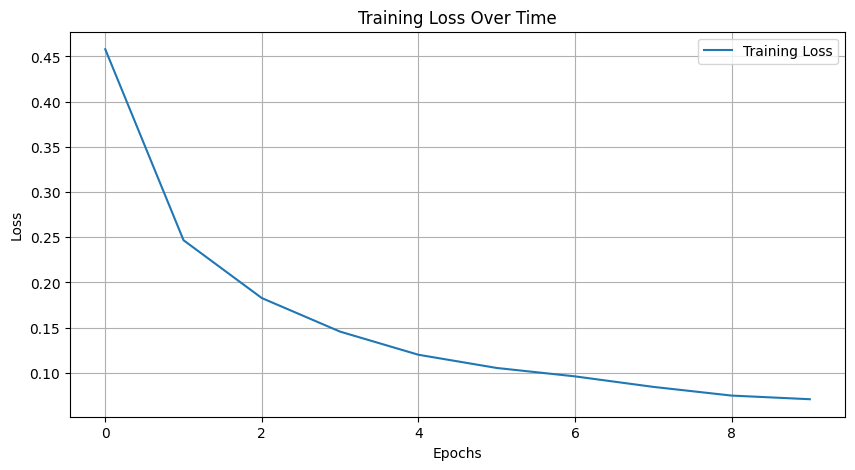

In [ ]:
import torch
import torchvision.transforms as transforms
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

# Define a function to evaluate the model and create confusion matrix and classification report
def evaluate_model(model, dataloader):
    model.eval()
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for data in dataloader:
            images, labels = data
            outputs = model(images)
            _, predictions = torch.max(outputs.data, 1)
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predictions.cpu().numpy())

    cm = confusion_matrix(all_labels, all_predictions)
    report = classification_report(all_labels, all_predictions)
    return cm, report

# Calculate the confusion matrix and classification report for the validation set
val_confusion_matrix, val_classification_report = evaluate_model(net, valloader)

# Calculate the confusion matrix and classification report for the test set
test_confusion_matrix, test_classification_report = evaluate_model(net, testloader)





# Plotting Training Loss Graph:

In [ ]:
# Plot the training loss graph
plt.figure(figsize=(10, 5))
plt.plot(range(num_epochs), training_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Time')
plt.legend()
plt.grid(True)
plt.show()

# Displaying Confusion Matrix:

In [ ]:
# Display the confusion matrices
print("Validation Confusion Matrix:")
print(val_confusion_matrix)

print("\nTest Confusion Matrix:")
print(test_confusion_matrix)

Validation Confusion Matrix:
[[ 952    0    2    0    0    5    1    0    2    1]
 [   0 1082    5    1    3    0    3    0    3    2]
 [   2    0  900    4    5    2    2    0    5    3]
 [   1    0   16  984    0   13    1    0    5    2]
 [   0    1    2    0  937    0    8    0    1   12]
 [   2    1    3   10    2  810    9    1    2    4]
 [   2    1    1    0    5    2  936    0    1    0]
 [   1    5   10   13    3    4    2  905    2   33]
 [   4    4    3   16    1    5    4    1  877    7]
 [   3    1    0    3   15   10    0    4    4  900]]

Test Confusion Matrix:
[[1154    0    1    1    4    4    3    0    6    2]
 [   1 1300   13    3    2    0    1    0    1    1]
 [   2    1 1146    2    1    5    0    4    9    4]
 [   1    0   23 1161    0   18    0    1    9    6]
 [   1    2    1    0 1150    0    5    1    3   13]
 [   7    3    1   11    3 1064    9    0    5    1]
 [   5    1    2    0    1    3 1163    0    2    0]
 [   0   10   26   12    5    5    0 1195    

# Diaplaying Classification Report:
- A classification report provides a concise summary of key performance metrics for each class, including accuracy, precision, recall, F1-score, and support.
- These metrics offer a high-level view of the model's performance on each class.

In [ ]:
print("\nValidation Classification Report:")
print(val_classification_report)
print("\nTest Classification Report:")
print(test_classification_report)


Validation Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       963
           1       0.99      0.98      0.99      1099
           2       0.96      0.98      0.97       923
           3       0.95      0.96      0.96      1022
           4       0.96      0.98      0.97       961
           5       0.95      0.96      0.96       844
           6       0.97      0.99      0.98       948
           7       0.99      0.93      0.96       978
           8       0.97      0.95      0.96       922
           9       0.93      0.96      0.95       940

    accuracy                           0.97      9600
   macro avg       0.97      0.97      0.97      9600
weighted avg       0.97      0.97      0.97      9600


Test Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1175
           1       0.98      0.98      0.98      1322
           2  

# Plotting Confusion Matrix:
- ***sns.heatmap*** is a function from the seaborn library for creating heatmap visualizations.
- The resulting visualization is a heatmap that provides a visual representation of the confusion matrix, making it easier to interpret and analyze the model's performance on different classes.
- Darker shades of blue in the heatmap represent higher counts or values in the confusion matrix. These typically correspond to correct predictions (true positives and true negatives).
- Lighter shades of blue represent lower counts or values in the confusion matrix. These usually correspond to incorrect predictions (false positives and false negatives).

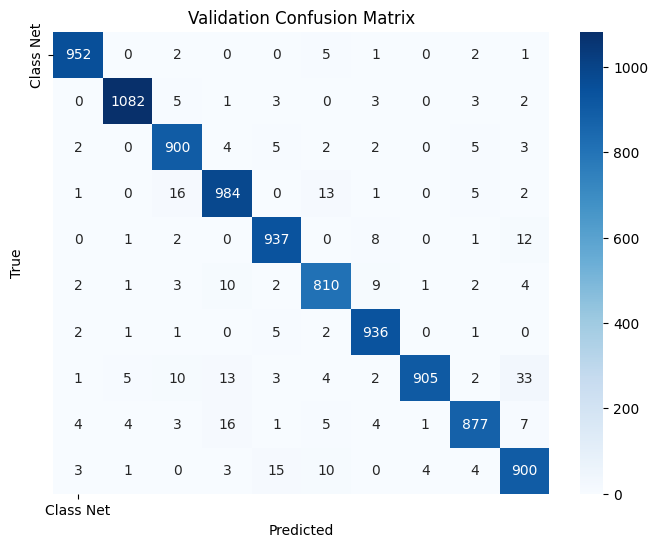

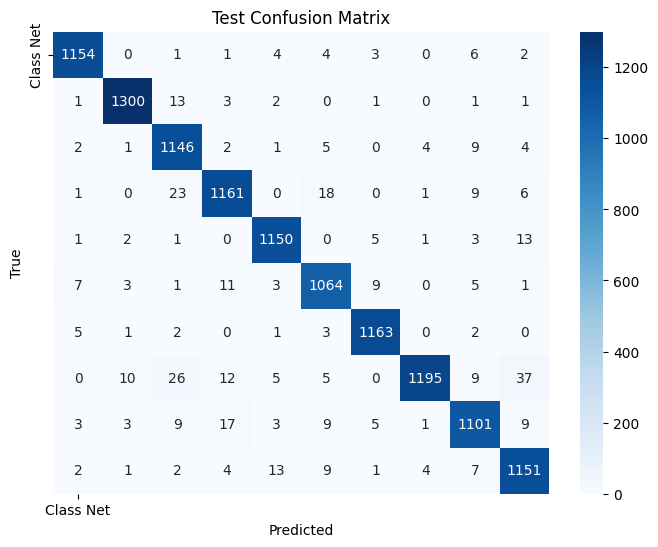

In [ ]:
import seaborn as sns

# Define your class names as a list
class_names = ["Class Net"]

# Define a function to plot a confusion matrix
def plot_confusion_matrix(confusion_matrix, class_names, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Plot the validation confusion matrix
plot_confusion_matrix(val_confusion_matrix, class_names, "Validation Confusion Matrix")

# Plot the test confusion matrix
plot_confusion_matrix(test_confusion_matrix, class_names, "Test Confusion Matrix")


